In [1]:
from requests import get
import requests
from bs4 import BeautifulSoup
import os
import json
from pprint import pprint
import re

import itertools as it
from typing import List, Dict
import pandas as pd
from env import path

import unicodedata
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud


In [2]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = (nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS)
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]



In [3]:
file = 'spam_clean.csv'

In [4]:
df = pd.read_csv(path+file, encoding='ISO-8859-1')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Prepare Data

In [145]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [146]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [147]:
sms = df.copy()

In [148]:
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [149]:
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [150]:
labels = pd.concat([sms.label.value_counts(),
                    sms.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [151]:
ham_words = clean(' '.join(sms[sms.label == 'ham'].text))
spam_words = clean(' '.join(sms[sms.label == 'spam'].text))
all_words = clean(' '.join(sms.text))

In [152]:
all_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'aa150',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'winner',
 'valued',
 'network',
 'c

In [153]:
if 'u' in all_words:
    print(True)
if 'u' in ham_words:
    print(True)
if 'u' in spam_words:
    print(True)

True
True
True


In [154]:
pd.Series(all_words).value_counts()

call                         600
im                           462
get                          397
ur                           384
go                           304
4                            287
dont                         279
ok                           277
free                         275
know                         267
come                         247
like                         245
day                          241
got                          238
ill                          237
good                         235
time                         232
text                         214
want                         213
love                         203
send                         190
need                         182
one                          180
going                        171
today                        169
txt                          163
home                         162
lor                          160
see                          157
sorry                        156
          

In [155]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()


print('Top 20 BOW for spam...\n',spam_freq.head(20), '\n\nTop 20 BOW for ham...\n', ham_freq.head(20),'\n\nTop 20 BOW for all words...\n', all_freq.head(20))

Top 20 BOW for spam...
 call       359
free       216
txt        150
ur         144
text       137
mobile     135
4          119
claim      115
stop       113
reply      102
prize       94
get         83
tone        73
service     72
new         69
send        67
nokia       65
urgent      63
week        62
cash        62
dtype: int64 

Top 20 BOW for ham...
 im      449
get     314
go      273
ok      272
dont    257
come    242
call    241
know    241
ur      240
ill     236
like    232
got     231
good    223
day     214
time    213
love    193
want    183
need    171
one     170
4       168
dtype: int64 

Top 20 BOW for all words...
 call    600
im      462
get     397
ur      384
go      304
4       287
dont    279
ok      277
free    275
know    267
come    247
like    245
day     241
got     238
ill     237
good    235
time    232
text    214
want    213
love    203
dtype: int64


In [156]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


In [157]:
word_counts.tail()

,all,ham,spam
zoe,2,1,1
zogtorius,1,1,0
zoom,1,1,0
zouk,1,0,1
zyada,1,1,0


In [158]:
word_counts.sort_values(by='all', ascending=False)


,all,ham,spam
call,600,241,359
im,462,449,13
get,397,314,83
ur,384,240,144
go,304,273,31
4,287,168,119
dont,279,257,22
ok,277,272,5
free,275,59,216
know,267,241,26


In [85]:
word_counts.isnull().sum()

all     0
ham     0
spam    0
dtype: int64

In [86]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
call,600,241,359
im,462,449,13
get,397,314,83
ur,384,240,144
go,304,273,31
4,287,168,119
dont,279,257,22
ok,277,272,5
free,275,59,216
know,267,241,26


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

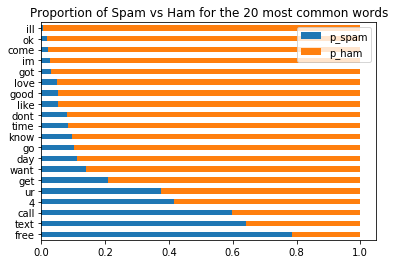

In [87]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')

## Exercises

In [88]:
ham = sms[sms.label == 'ham']
spam = sms[sms.label == 'spam']

In [89]:
ham['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
10      I'm gonna be home soon and i don't want to tal...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
16                             Oh k...i'm watching here:)
17      Eh u remember how 2 spell his name... Yes i di...
18      Fine if thatÃ¥Ãs the way u feel. ThatÃ¥Ãs th...
20              Is that seriously how you spell his name?
21      IÂÃÃ·m going to try for 2 months ha ha only ...
22      So Ã_ pay first lar... Then when is da stock ...
23      Aft i finish my lunch then i go str down lor. ...
24      Ffffffffff. Alright no way I can meet up with ...
25      Just f

## Word clouds

(-0.5, 399.5, 199.5, -0.5)

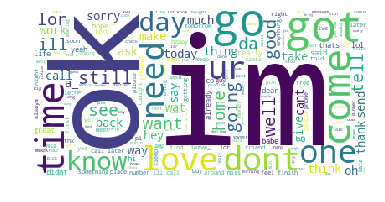

In [90]:
img = WordCloud(background_color='white').generate(' '.join(ham_words))
plt.imshow(img)
plt.axis('off')


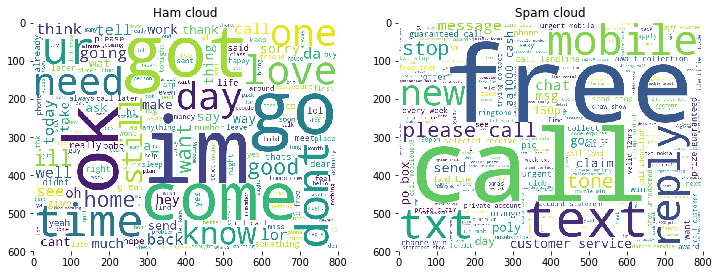

In [91]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

# fig, ax = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.imshow(ham_cloud)
plt.title('Ham cloud')
plt.box(False)

plt.subplot(1, 2, 2)
plt.imshow(spam_cloud)
plt.title('Spam cloud')

fig.tight_layout(pad=2)

plt.box(False)
# for ax in axs: ax.axis('off')

## Bigrams

In [108]:
ham_bigrams_list = nltk.ngrams(' '.join(ham_words).split(), 2)
list(ham_bigrams_list)

[('go', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', 'ok'),
 ('ok', 'lar'),
 ('lar', 'joking'),
 ('joking', 'wif'),
 ('wif', 'oni'),
 ('oni', 'dun'),
 ('dun', 'say'),
 ('say', 'early'),
 ('early', 'hor'),
 ('hor', 'c'),
 ('c', 'already'),
 ('already', 'say'),
 ('say', 'nah'),
 ('nah', 'dont'),
 ('dont', 'think'),
 ('think', 'go'),
 ('go', 'usf'),
 ('usf', 'life'),
 ('life', 'around'),
 ('around', 'though'),
 ('though', 'even'),
 ('even', 'brother'),
 ('brother', 'like'),
 ('like', 'speak'),
 ('speak', 'treat'),
 ('treat', 'like'),
 ('like', 'aid'),
 ('aid', 'patent'),
 ('patent', 'per'),
 ('per', 'request'),
 ('request', 'melle'),
 ('melle', 'melle'),
 ('melle', 'oru'),
 ('oru', 'minnaminunginte'),
 ('minnaminunginte', 'nurungu'),
 ('nurung

In [109]:
ham_bigrams = pd.Series(nltk.ngrams(' '.join(ham_words).split(), 2)).value_counts()

In [110]:
ham_bigrams

(call, later)            52
(ill, call)              48
(let, know)              42
(sorry, ill)             39
(dont, know)             32
(good, morning)          31
(new, year)              30
(take, care)             26
(im, going)              24
(ok, lor)                22
(pls, send)              22
(im, gonna)              20
(good, night)            19
(happy, new)             19
(wat, time)              18
(last, night)            18
(hi, hi)                 18
(great, day)             17
(send, message)          15
(nice, day)              15
(want, go)               15
(dont, want)             15
(hope, good)             14
(4, dinner)              14
(dont, think)            14
(cant, pick)             13
(want, come)             13
(pick, phone)            13
(good, afternoon)        13
(im, home)               13
                         ..
(meet, 11)                1
(useless, calling)        1
(stealing, phone)         1
(happiness, every)        1
(lol, knew)         

Text(0.5, 1.0, 'Ham Bigrams Top 20 Frequencies')

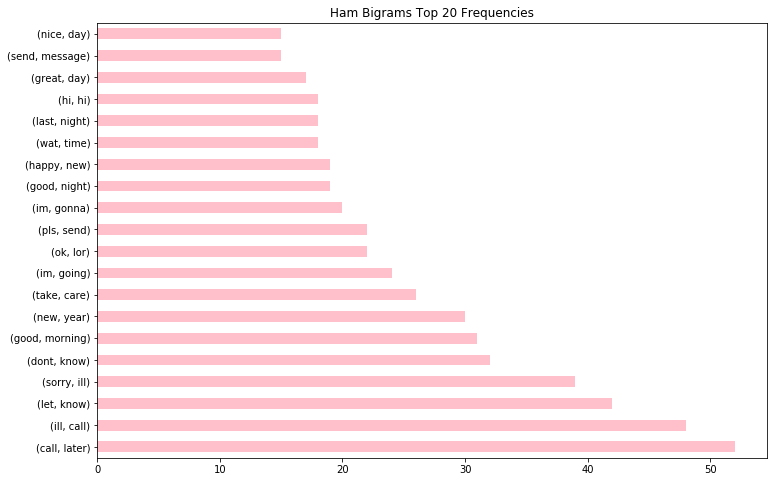

In [115]:
ham_bigrams.head(20).plot.barh(figsize=(12, 8), color='pink')
plt.title('Ham Bigrams Top 20 Frequencies')

In [112]:
ham_freq = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
ham_freq

{'call later': 52,
 'ill call': 48,
 'let know': 42,
 'sorry ill': 39,
 'dont know': 32,
 'good morning': 31,
 'new year': 30,
 'take care': 26,
 'im going': 24,
 'ok lor': 22,
 'pls send': 22,
 'im gonna': 20,
 'good night': 19,
 'happy new': 19,
 'wat time': 18,
 'last night': 18,
 'hi hi': 18,
 'great day': 17,
 'send message': 15,
 'nice day': 15,
 'want go': 15,
 'dont want': 15,
 'hope good': 14,
 '4 dinner': 14,
 'dont think': 14,
 'cant pick': 13,
 'want come': 13,
 'pick phone': 13,
 'good afternoon': 13,
 'im home': 13,
 'cant wait': 12,
 'dun wan': 12,
 'im sorry': 12,
 'phone right': 12,
 'gud mrng': 12,
 'come home': 12,
 'right pls': 12,
 'happy birthday': 12,
 'wait 4': 12,
 'come back': 12,
 'ill get': 11,
 'last week': 11,
 'gud ni8': 11,
 'good day': 11,
 'x x': 11,
 'thats cool': 11,
 '4 lunch': 11,
 'get back': 11,
 'ill text': 11,
 'text youre': 10,
 'watching tv': 10,
 'didnt get': 10,
 'across sea': 10,
 'go day': 10,
 'feel like': 10,
 'come n': 10,
 'next week'

In [118]:
spam_bigrams_list = nltk.ngrams(' '.join(spam_words).split(), 2)
list(spam_bigrams_list)

[('free', 'entry'),
 ('entry', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'win'),
 ('win', 'fa'),
 ('fa', 'cup'),
 ('cup', 'final'),
 ('final', 'tkts'),
 ('tkts', '21st'),
 ('21st', 'may'),
 ('may', '2005'),
 ('2005', 'text'),
 ('text', 'fa'),
 ('fa', '87121'),
 ('87121', 'receive'),
 ('receive', 'entry'),
 ('entry', 'questionstd'),
 ('questionstd', 'txt'),
 ('txt', 'ratetcs'),
 ('ratetcs', 'apply'),
 ('apply', '08452810075over18s'),
 ('08452810075over18s', 'freemsg'),
 ('freemsg', 'hey'),
 ('hey', 'darling'),
 ('darling', '3'),
 ('3', 'week'),
 ('week', 'word'),
 ('word', 'back'),
 ('back', 'id'),
 ('id', 'like'),
 ('like', 'fun'),
 ('fun', 'still'),
 ('still', 'tb'),
 ('tb', 'ok'),
 ('ok', 'xxx'),
 ('xxx', 'std'),
 ('std', 'chgs'),
 ('chgs', 'send'),
 ('send', 'aa150'),
 ('aa150', 'rcv'),
 ('rcv', 'winner'),
 ('winner', 'valued'),
 ('valued', 'network'),
 ('network', 'customer'),
 ('customer', 'selected'),
 ('selected', 'receivea'),
 ('receivea', 'aa900'),
 ('aa900', 'prize'),
 ('prize', 

In [122]:
spam_bigrams = pd.Series(nltk.ngrams(' '.join(spam_words).split(), 2)).value_counts()

In [121]:
spam_bigrams

(call, later)            52
(ill, call)              48
(let, know)              42
(sorry, ill)             39
(dont, know)             32
(good, morning)          31
(new, year)              30
(take, care)             26
(im, going)              24
(ok, lor)                22
(pls, send)              22
(im, gonna)              20
(good, night)            19
(happy, new)             19
(wat, time)              18
(last, night)            18
(hi, hi)                 18
(great, day)             17
(send, message)          15
(nice, day)              15
(want, go)               15
(dont, want)             15
(hope, good)             14
(4, dinner)              14
(dont, think)            14
(cant, pick)             13
(want, come)             13
(pick, phone)            13
(good, afternoon)        13
(im, home)               13
                         ..
(meet, 11)                1
(useless, calling)        1
(stealing, phone)         1
(happiness, every)        1
(lol, knew)         

Text(0.5, 1.0, 'Spam Bigrams Top 20 Frequencies')

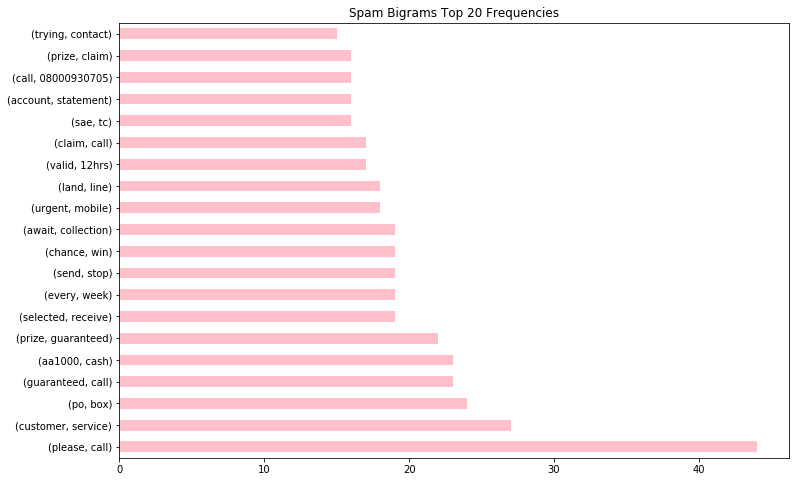

In [123]:
spam_bigrams.head(20).plot.barh(figsize=(12, 8), color='pink')
plt.title('Spam Bigrams Top 20 Frequencies')

In [124]:
spam_freq = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
spam_freq

{'please call': 44,
 'customer service': 27,
 'po box': 24,
 'guaranteed call': 23,
 'aa1000 cash': 23,
 'prize guaranteed': 22,
 'selected receive': 19,
 'every week': 19,
 'send stop': 19,
 'chance win': 19,
 'await collection': 19,
 'urgent mobile': 18,
 'land line': 18,
 'valid 12hrs': 17,
 'claim call': 17,
 'sae tc': 16,
 'account statement': 16,
 'call 08000930705': 16,
 'prize claim': 16,
 'trying contact': 15,
 'call customer': 15,
 'free entry': 15,
 'call mobileupd8': 15,
 'identifier code': 15,
 'reply call': 15,
 'draw show': 15,
 'dating service': 15,
 'ur mob': 15,
 'attempt contact': 14,
 'ur awarded': 14,
 'week txt': 14,
 'tell ur': 14,
 'line claim': 14,
 'free text': 14,
 'free call': 14,
 'txt stop': 14,
 '2nd attempt': 14,
 'camera phone': 13,
 'txt nokia': 13,
 'double min': 13,
 'claim ur': 13,
 'private 2003': 13,
 '2003 account': 13,
 'gift voucher': 13,
 'nokia tone': 12,
 'guaranteed aa1000': 12,
 'tried contact': 12,
 'show 800': 12,
 'camcorder reply': 12,

## Word Cloud comparing the Ham and Spam Bigrams

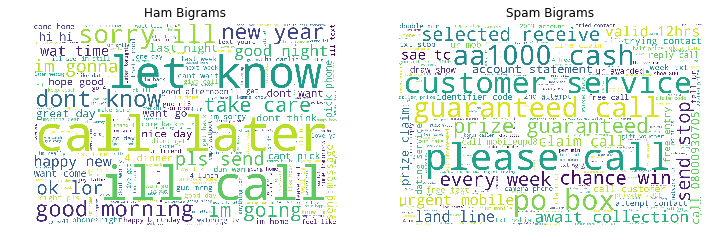

In [127]:
cloud = WordCloud(height=800, width=1200, background_color='white')
ham_bigram_cloud = cloud.generate_from_frequencies(ham_freq)

cloud = WordCloud(height=800, width=1200, background_color='white')
spam_bigram_cloud = cloud.generate_from_frequencies(spam_freq)

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.imshow(ham_bigram_cloud)
plt.axis('off')
plt.title('Ham Bigrams')

plt.subplot(1, 2, 2)
plt.imshow(spam_bigram_cloud)
plt.axis('off')
plt.title('Spam Bigrams')

fig.tight_layout(pad=2)

plt.box(False)

### Trigrams

In [128]:
ham_trigrams_list = nltk.ngrams(' '.join(ham_words).split(), 3)
list(ham_trigrams_list)

[('go', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'bugis'),
 ('available', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', 'cine'),
 ('buffet', 'cine', 'got'),
 ('cine', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', 'ok'),
 ('wat', 'ok', 'lar'),
 ('ok', 'lar', 'joking'),
 ('lar', 'joking', 'wif'),
 ('joking', 'wif', 'oni'),
 ('wif', 'oni', 'dun'),
 ('oni', 'dun', 'say'),
 ('dun', 'say', 'early'),
 ('say', 'early', 'hor'),
 ('early', 'hor', 'c'),
 ('hor', 'c', 'already'),
 ('c', 'already', 'say'),
 ('already', 'say', 'nah'),
 ('say', 'nah', 'dont'),
 ('nah', 'dont', 'think'),
 ('dont', 'think', 'go'),
 ('think', 'go', 'usf'),
 ('go', 'usf', 'life'),
 ('usf', 'life', 'around'),
 ('life', 'around', 'though'),
 ('around', 'though', 'even'),
 ('though', 'even', 'brother'),
 ('even', 'brother', 'like'),

In [129]:
ham_trigrams = pd.Series(nltk.ngrams(' '.join(ham_words).split(), 3)).value_counts()

In [130]:
ham_trigrams

(ill, call, later)                42
(sorry, ill, call)                38
(happy, new, year)                19
(pls, send, message)              13
(cant, pick, phone)               12
(pick, phone, right)              12
(phone, right, pls)               12
(right, pls, send)                12
(hi, hi, hi)                      11
(x, x, x)                          8
(good, morning, dear)              7
(kiss, across, sea)                6
(pls, convey, birthday)            6
(convey, birthday, wish)           6
(call, later, meeting)             6
(pa, said, happy)                  5
(bday, wife, didnt)                5
(bos, felt, special)               5
(entered, cabin, pa)               5
(bedroom, minute, ok)              5
(copy, friend, callertune)         5
(love, go, day)                    5
(invited, apartment, went)         5
(forgot, n, kid)                   5
(story, man, last)                 5
(happy, bday, bos)                 5
(bday, bos, felt)                  5
(

Text(0.5, 1.0, 'Ham Trigrams Top 20 Frequencies')

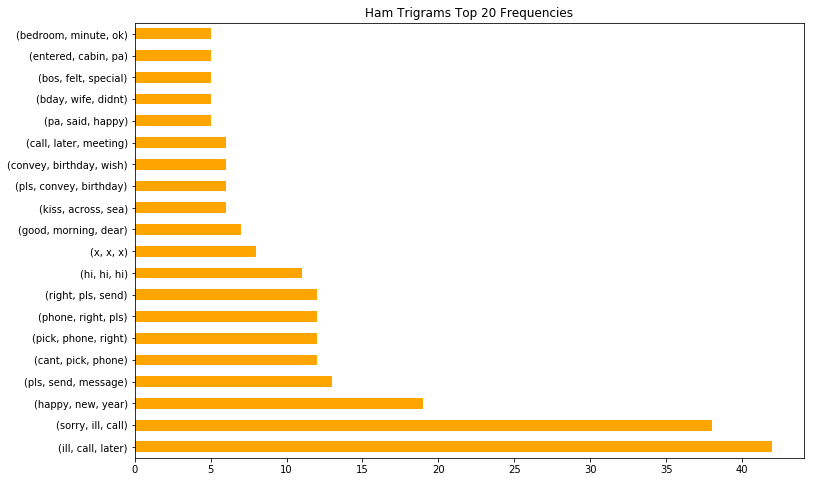

In [132]:
ham_trigrams.head(20).plot.barh(figsize=(12, 8), color='orange')
plt.title('Ham Trigrams Top 20 Frequencies')

In [134]:
ham_tri_freq = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
ham_tri_freq

{'ill call later': 42,
 'sorry ill call': 38,
 'happy new year': 19,
 'pls send message': 13,
 'cant pick phone': 12,
 'pick phone right': 12,
 'phone right pls': 12,
 'right pls send': 12,
 'hi hi hi': 11,
 'x x x': 8,
 'good morning dear': 7,
 'kiss across sea': 6,
 'pls convey birthday': 6,
 'convey birthday wish': 6,
 'call later meeting': 6,
 'pa said happy': 5,
 'bday wife didnt': 5,
 'bos felt special': 5,
 'entered cabin pa': 5,
 'bedroom minute ok': 5,
 'copy friend callertune': 5,
 'love go day': 5,
 'invited apartment went': 5,
 'forgot n kid': 5,
 'story man last': 5,
 'happy bday bos': 5,
 'bday bos felt': 5,
 'week bday wife': 5,
 'last week bday': 5,
 'sed sexy mood': 5,
 'said mind go': 5,
 'minute ok sed': 5,
 'sad story man': 5,
 'callertune caller press': 5,
 'said happy bday': 5,
 'go bedroom minute': 5,
 'good afternoon love': 5,
 'mood came 5': 5,
 'special askd 4': 5,
 'man last week': 5,
 'kid went work': 5,
 'even colleague wish': 5,
 '4 lunch lunch': 5,
 'pres

In [135]:
spam_trigrams_list = nltk.ngrams(' '.join(spam_words).split(), 3)
list(spam_trigrams_list)

[('free', 'entry', 'wkly'),
 ('entry', 'wkly', 'comp'),
 ('wkly', 'comp', 'win'),
 ('comp', 'win', 'fa'),
 ('win', 'fa', 'cup'),
 ('fa', 'cup', 'final'),
 ('cup', 'final', 'tkts'),
 ('final', 'tkts', '21st'),
 ('tkts', '21st', 'may'),
 ('21st', 'may', '2005'),
 ('may', '2005', 'text'),
 ('2005', 'text', 'fa'),
 ('text', 'fa', '87121'),
 ('fa', '87121', 'receive'),
 ('87121', 'receive', 'entry'),
 ('receive', 'entry', 'questionstd'),
 ('entry', 'questionstd', 'txt'),
 ('questionstd', 'txt', 'ratetcs'),
 ('txt', 'ratetcs', 'apply'),
 ('ratetcs', 'apply', '08452810075over18s'),
 ('apply', '08452810075over18s', 'freemsg'),
 ('08452810075over18s', 'freemsg', 'hey'),
 ('freemsg', 'hey', 'darling'),
 ('hey', 'darling', '3'),
 ('darling', '3', 'week'),
 ('3', 'week', 'word'),
 ('week', 'word', 'back'),
 ('word', 'back', 'id'),
 ('back', 'id', 'like'),
 ('id', 'like', 'fun'),
 ('like', 'fun', 'still'),
 ('fun', 'still', 'tb'),
 ('still', 'tb', 'ok'),
 ('tb', 'ok', 'xxx'),
 ('ok', 'xxx', 'std'),

In [136]:
spam_trigrams = pd.Series(nltk.ngrams(' '.join(spam_words).split(), 3)).value_counts()

In [137]:
spam_trigrams

(prize, guaranteed, call)                   21
(call, customer, service)                   15
(reply, call, 08000930705)                  14
(land, line, claim)                         14
(private, 2003, account)                    13
(2003, account, statement)                  13
(guaranteed, aa1000, cash)                  12
(camcorder, reply, call)                    12
(show, 800, unredeemed)                     12
(bonus, caller, prize)                      11
(every, week, txt)                          11
(tone, 4, ur)                               11
(urgent, trying, contact)                   11
(anytime, network, min)                     11
(please, call, customer)                    11
(cash, await, collection)                   10
(aa2000, bonus, caller)                     10
(speak, live, operator)                     10
(customer, service, representative)         10
(800, unredeemed, point)                     9
(free, 1st, week)                            9
(trying, cont

Text(0.5, 1.0, 'Spam Trigrams Top 20 Frequencies')

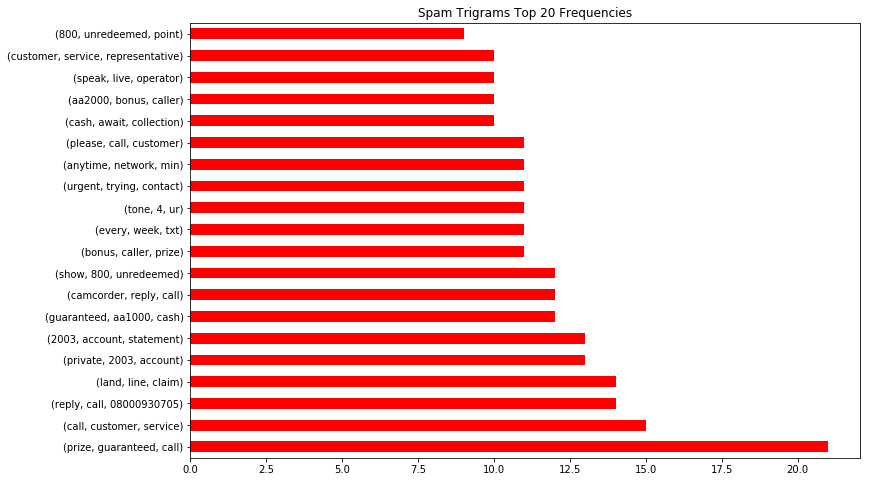

In [138]:
spam_trigrams.head(20).plot.barh(figsize=(12, 8), color='red')
plt.title('Spam Trigrams Top 20 Frequencies')

In [140]:
spam_tri_freq = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}
spam_tri_freq

{'prize guaranteed call': 21,
 'call customer service': 15,
 'reply call 08000930705': 14,
 'land line claim': 14,
 'private 2003 account': 13,
 '2003 account statement': 13,
 'guaranteed aa1000 cash': 12,
 'camcorder reply call': 12,
 'show 800 unredeemed': 12,
 'bonus caller prize': 11,
 'every week txt': 11,
 'tone 4 ur': 11,
 'urgent trying contact': 11,
 'anytime network min': 11,
 'please call customer': 11,
 'cash await collection': 10,
 'aa2000 bonus caller': 10,
 'speak live operator': 10,
 'customer service representative': 10,
 '800 unredeemed point': 9,
 'free 1st week': 9,
 'trying contact today': 9,
 'today draw show': 9,
 'aa2000 prize guaranteed': 9,
 'urgent mobile number': 9,
 '750 anytime network': 9,
 'mob every week': 9,
 'contact today draw': 9,
 'txt music 87066': 9,
 '4 ur mob': 9,
 'draw txt music': 9,
 'nokia tone 4': 9,
 'ur mob every': 9,
 'unredeemed point call': 9,
 'aa1000 cash aa2000': 8,
 'contact ufind rreveal': 8,
 'await collection sae': 8,
 'special

## Word Cloud comparing the Ham and Spam Trigrams

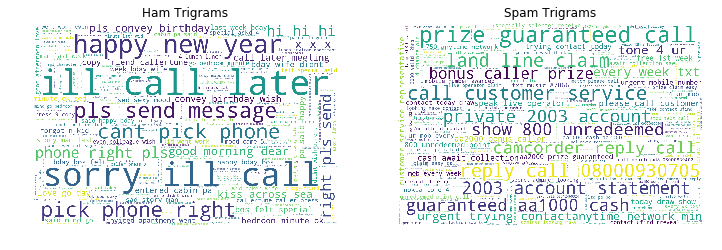

In [141]:
cloud = WordCloud(height=800, width=1200, background_color='white')
ham_trigram_cloud = cloud.generate_from_frequencies(ham_tri_freq)
cloud = WordCloud(height=800, width=1200, background_color='white')
spam_trigram_cloud = cloud.generate_from_frequencies(spam_tri_freq)

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.imshow(ham_trigram_cloud)
plt.axis('off')
plt.title('Ham Trigrams')

plt.subplot(1, 2, 2)
plt.imshow(spam_trigram_cloud)
plt.axis('off')
plt.title('Spam Trigrams')

fig.tight_layout(pad=2)

plt.box(False)

# Codeup Blog Text Analysis

In [159]:
from acquisition import get_blog_articles_save

/Users/taco/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/acquisition.py:41: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 41 of the file /Users/taco/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/acquisition.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
/Users/taco/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/acquisition.py:41: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtua

In [160]:
get_blog_articles_save()

[{'title': 'codeups-data-science-career-accelerator-is-here',
  'contents': 'The rumors are true! The time has arrived. Codeup has officially opened applications to our new Data Science career accelerator, with only 25 seats available! This immersive program is one of a kind in San Antonio, and will help you land a job in\xa0Glassdoor’s #1 Best Job in America.\nData Science is a method of providing actionable intelligence from data.\xa0The data revolution has hit San Antonio,\xa0resulting in an explosion in Data Scientist positions\xa0across companies like USAA, Accenture, Booz Allen Hamilton, and HEB. We’ve even seen\xa0UTSA invest $70 M for a Cybersecurity Center and School of Data Science.\xa0We built a program to specifically meet the growing demands of this industry.\nOur program will be 18 weeks long, full-time, hands-on, and project-based. Our curriculum development and instruction is led by Senior Data Scientist, Maggie Giust, who has worked at HEB, Capital Group, and Rackspace

In [162]:
cudf = pd.DataFrame(get_blog_articles_save())

In [190]:
cudf

,contents,title,url
0,The rumors are true! The time has arrived. Cod...,codeups-data-science-career-accelerator-is-here,https://codeup.com/codeups-data-science-career...
1,By Dimitri Antoniou and Maggie Giust\nData Sci...,data-science-myths,https://codeup.com/data-science-myths/
2,"By Dimitri Antoniou\nA week ago, Codeup launch...",data-science-vs-data-analytics-whats-the-diffe...,https://codeup.com/data-science-vs-data-analyt...
3,10 Tips to Crush It at the SA Tech Job Fair\nS...,10-tips-to-crush-it-at-the-sa-tech-job-fair,https://codeup.com/10-tips-to-crush-it-at-the-...
4,Competitor Bootcamps Are Closing. Is the Model...,competitor-bootcamps-are-closing-is-the-model-...,https://codeup.com/competitor-bootcamps-are-cl...


In [171]:
cu_contents = []
for element in cudf.contents:
    cu_contents.append(clean(element))

In [175]:
len(cu_contents)

5

In [176]:
all_cu_words = []
for article in cu_contents:
    for element in article:
        all_cu_words.append(element)
all_cu_words

['rumor',
 'true',
 'time',
 'arrived',
 'codeup',
 'officially',
 'opened',
 'application',
 'new',
 'data',
 'science',
 'career',
 'accelerator',
 '25',
 'seat',
 'available',
 'immersive',
 'program',
 'one',
 'kind',
 'san',
 'antonio',
 'help',
 'land',
 'job',
 'glassdoors',
 '1',
 'best',
 'job',
 'america',
 'data',
 'science',
 'method',
 'providing',
 'actionable',
 'intelligence',
 'data',
 'data',
 'revolution',
 'hit',
 'san',
 'antonio',
 'resulting',
 'explosion',
 'data',
 'scientist',
 'position',
 'across',
 'company',
 'like',
 'usaa',
 'accenture',
 'booz',
 'allen',
 'hamilton',
 'heb',
 'weve',
 'even',
 'seen',
 'utsa',
 'invest',
 '70',
 'cybersecurity',
 'center',
 'school',
 'data',
 'science',
 'built',
 'program',
 'specifically',
 'meet',
 'growing',
 'demand',
 'industry',
 'program',
 '18',
 'week',
 'long',
 'fulltime',
 'handson',
 'projectbased',
 'curriculum',
 'development',
 'instruction',
 'led',
 'senior',
 'data',
 'scientist',
 'maggie',
 'gius

In [180]:
' '.join(all_cu_words)

'rumor true time arrived codeup officially opened application new data science career accelerator 25 seat available immersive program one kind san antonio help land job glassdoors 1 best job america data science method providing actionable intelligence data data revolution hit san antonio resulting explosion data scientist position across company like usaa accenture booz allen hamilton heb weve even seen utsa invest 70 cybersecurity center school data science built program specifically meet growing demand industry program 18 week long fulltime handson projectbased curriculum development instruction led senior data scientist maggie giust worked heb capital group rackspace along input dozen practitioner hiring partner student work real data set realistic problem entire data science pipeline collection deployment receive professional development training resume writing interviewing continuing education prepare smooth transition workforce focus applied data science immediate impact roi bus

In [177]:
all_cu_freq = pd.Series(all_cu_words).value_counts()
all_cu_freq

data              78
science           29
company           20
learning          20
job               15
machine           14
scientist         13
model             12
like              12
new               10
fair              10
one               10
codeup            10
education         10
work               9
tech               8
statistic          8
business           8
program            8
time               8
make               8
big                7
dont               7
myth               7
look               7
recruiter          7
question           7
u                  7
student            7
intelligence       6
                  ..
domain             1
quickly            1
recommendation     1
specialist         1
check              1
businessdata       1
refers             1
clustering         1
explosion          1
necessarily        1
even               1
frontend           1
neural             1
slidertypehero     1
land               1
worry              1
revolution   

Text(0.5, 1.0, 'All Words in 5 Codeup Blog Articles')

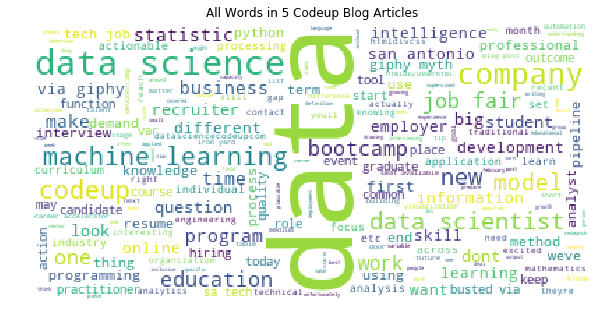

In [182]:
img = WordCloud(background_color='white').generate(' '.join(all_cu_words))
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.title('All Words in 5 Codeup Blog Articles')

## Bigrams

In [184]:
bigrams = nltk.ngrams(all_cu_words,2)

In [186]:
top20 = pd.Series(nltk.ngrams(all_cu_words, 2)).value_counts().head(20)

In [187]:
top20

(data, science)            29
(machine, learning)        14
(data, scientist)          13
(job, fair)                10
(san, antonio)              6
(via, giphy)                6
(tech, job)                 5
(giphy, myth)               5
(intelligence, data)        4
(sa, tech)                  4
(busted, via)               4
(bootcamp, model)           4
(10, tip)                   3
(career, accelerator)       3
(iron, yard)                3
(programming, bootcamp)     3
(u, today)                  3
(big, education)            3
(blog, post)                3
(big, data)                 3
dtype: int64

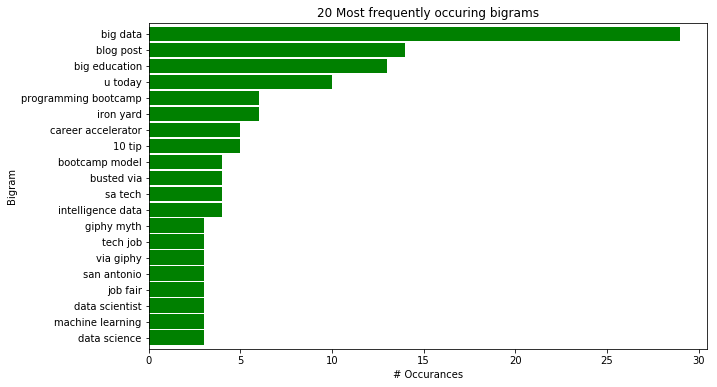

In [188]:
top20.sort_values().plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top20.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [204]:
top20.to_dict().items()

dict_items([(('data', 'science'), 29), (('machine', 'learning'), 14), (('data', 'scientist'), 13), (('job', 'fair'), 10), (('san', 'antonio'), 6), (('via', 'giphy'), 6), (('tech', 'job'), 5), (('giphy', 'myth'), 5), (('intelligence', 'data'), 4), (('sa', 'tech'), 4), (('busted', 'via'), 4), (('bootcamp', 'model'), 4), (('10', 'tip'), 3), (('career', 'accelerator'), 3), (('iron', 'yard'), 3), (('programming', 'bootcamp'), 3), (('u', 'today'), 3), (('big', 'education'), 3), (('blog', 'post'), 3), (('big', 'data'), 3)])

(-0.5, 799.5, 399.5, -0.5)

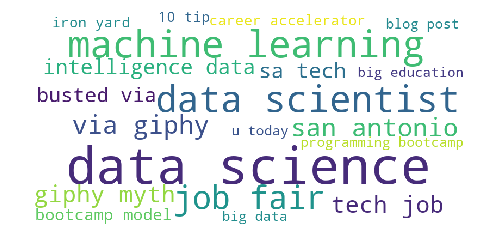

In [189]:
data = {k[0] + ' ' + k[1]: v for k, v in top20.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

#### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring. 

## News Articles Analysis

In [7]:
from acquisition import get_news_articles

/Users/taco/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/acquisition.py:41: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 41 of the file /Users/taco/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/acquisition.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
/Users/taco/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/acquisition.py:41: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtua

In [8]:
get_news_articles()

[{'title': "4th richest man Buffett says Tesla can't sell insurance, Musk responds",
  'content': 'After world\'s fourth-richest person Warren Buffett claimed carmaker Tesla cannot sell insurance, Tesla\'s CEO Elon Musk responded with a series of tweets on Sunday. In his first tweet, Musk urged users to buy Tesla Model 3, claiming it\'s cheaper than a Honda Accord. "Also 1000 times more fun!" and "That\'s a direct quote from Warren Buffett," his next tweets read.',
  'category': 'business'},
 {'title': 'Guj trader, who gifted cars to staff, to remove illegal road he built',
  'content': "Gujarat-based diamond trader Savji Dholakia, who's known for gifting cars to his employees, has said he'll remove a 'kutcha' road built by him across the dry Narmada river to reach his farmhouse. This comes after government officials visited the spot on learning about the illegal structure. Meanwhile, Dholakia said his only intention was to enable people to reach the island.",
  'category': 'business'}

In [9]:
df = pd.DataFrame(get_news_articles())

In [10]:
df.head()

,category,content,title
0,business,After world's fourth-richest person Warren Buf...,4th richest man Buffett says Tesla can't sell ...
1,business,"Gujarat-based diamond trader Savji Dholakia, w...","Guj trader, who gifted cars to staff, to remov..."
2,business,"World's fourth-richest person, Warren Buffett,...",I'll never hesitate to fly on 737 MAX: Buffett...
3,business,Activists in Hyderabad have claimed that Infos...,"Infosys makes Hyd staff pay for parking, activ..."
4,business,US Commerce Secretary Wilbur Ross on Monday sa...,We can't ensure cheaper oil sales to India aft...


In [23]:
cats = list(df.category.unique())
cats

['business', 'sports', 'technology', 'entertainment']

In [19]:
news = pd.DataFrame(columns={'category': '', 'content': '', 'title': ''})
news

,category,content,title


In [24]:
for thing in cats:
    print(thing)

business
sports
technology
entertainment


In [26]:
for thing in cats:
    print(df[df.category == thing])

    category                                            content  \
0   business  After world's fourth-richest person Warren Buf...   
1   business  Gujarat-based diamond trader Savji Dholakia, w...   
2   business  World's fourth-richest person, Warren Buffett,...   
3   business  Activists in Hyderabad have claimed that Infos...   
4   business  US Commerce Secretary Wilbur Ross on Monday sa...   
5   business  Proxy advisory firm InGovern has alleged that ...   
6   business  China's Xiaomi has released a statement disput...   
7   business  E-commerce conglomerate Infibeam Avenues' boar...   
8   business  Online travel website EaseMyTrip has reportedl...   
9   business  PepsiCo India withdrew its lawsuit against two...   
10  business  World's fourth-richest person Warren Buffett o...   
11  business  India has warned the World Trade Organisation ...   
12  business  India's largest drugmaker Sun Pharma is lookin...   
13  business  French telco Orange's ex-CEO Didier Lombard, a..

#### Create a dataframe that contains all the categories of news articles.

In [29]:
for thing in cats:
    news = news.append(df[df.category == thing])
news

,category,content,title
0,business,After world's fourth-richest person Warren Buf...,4th richest man Buffett says Tesla can't sell ...
1,business,"Gujarat-based diamond trader Savji Dholakia, w...","Guj trader, who gifted cars to staff, to remov..."
2,business,"World's fourth-richest person, Warren Buffett,...",I'll never hesitate to fly on 737 MAX: Buffett...
3,business,Activists in Hyderabad have claimed that Infos...,"Infosys makes Hyd staff pay for parking, activ..."
4,business,US Commerce Secretary Wilbur Ross on Monday sa...,We can't ensure cheaper oil sales to India aft...
5,business,Proxy advisory firm InGovern has alleged that ...,Britannia broke rules by not reporting Wadia's...
6,business,China's Xiaomi has released a statement disput...,"Inaccurate, unfair: Xiaomi on reported Q1 phon..."
7,business,E-commerce conglomerate Infibeam Avenues' boar...,Infibeam terminates EY affiliated auditor citi...
8,business,Online travel website EaseMyTrip has reportedl...,EaseMyTrip plans to raise up to ₹750 crore via...
9,business,PepsiCo India withdrew its lawsuit against two...,PepsiCo India withdraws lawsuit against two Gu...


#### Create a dataframe for each of the 4 categories of news articles

In [41]:
biz = news[news.category == 'business']
spo = news[news.category == 'sports']
tech = news[news.category == 'technology']
ent = news[news.category == 'entertainment']

In [44]:
biz

,category,content,title
0,business,After world's fourth-richest person Warren Buf...,4th richest man Buffett says Tesla can't sell ...
1,business,"Gujarat-based diamond trader Savji Dholakia, w...","Guj trader, who gifted cars to staff, to remov..."
2,business,"World's fourth-richest person, Warren Buffett,...",I'll never hesitate to fly on 737 MAX: Buffett...
3,business,Activists in Hyderabad have claimed that Infos...,"Infosys makes Hyd staff pay for parking, activ..."
4,business,US Commerce Secretary Wilbur Ross on Monday sa...,We can't ensure cheaper oil sales to India aft...
5,business,Proxy advisory firm InGovern has alleged that ...,Britannia broke rules by not reporting Wadia's...
6,business,China's Xiaomi has released a statement disput...,"Inaccurate, unfair: Xiaomi on reported Q1 phon..."
7,business,E-commerce conglomerate Infibeam Avenues' boar...,Infibeam terminates EY affiliated auditor citi...
8,business,Online travel website EaseMyTrip has reportedl...,EaseMyTrip plans to raise up to ₹750 crore via...
9,business,PepsiCo India withdrew its lawsuit against two...,PepsiCo India withdraws lawsuit against two Gu...


In [45]:
spo

,category,content,title
25,sports,RR pacer Jaydev Unadkat took to Twitter to res...,Fan asks Unadkat to join academy to learn how ...
26,sports,A day after featuring in the Chennai Super Kin...,"MS Dhoni votes in Ranchi, shares video of Ziva..."
27,sports,Mumbai Indians and Chennai Super Kings finishe...,What are the matchups for the IPL 2019 playoffs?
28,sports,"In a coincidence, Chennai Super Kings batsman ...","Rayudu, Shankar end IPL 2019 league stage with..."
29,sports,Umpire Nigel Llong damaged the door to umpires...,Umpire Nigel Llong damages door by kicking it ...
30,sports,The ICC took to Twitter to share a picture of ...,What should Dhoni do if he wins toss? IIT asks...
31,sports,Mumbai Indians defeated Kolkata Knight Riders ...,SRH 1st team to reach IPL playoffs with 12 poi...
32,sports,MI captain Rohit Sharma dedicated his fifty ag...,She was asleep when I hit 50: Rohit on dedicat...
33,sports,Commentator Harsha Bhogle took to Twitter to c...,Bhogle clarifies after mistakenly snubbing Har...
34,sports,Smriti Mandhana-led Trailblazers defeated Harm...,Mandhana's Trailblazers beat Harmanpreet's Sup...


In [46]:
tech

,category,content,title
49,technology,OnePlus has revealed the OnePlus 7 Pro will fe...,OnePlus confirms HDR10+ display for OnePlus 7 ...
50,technology,Several people are locating East Delhi's Ghazi...,People give 5-stars to Delhi 'Mountain of Garb...
51,technology,Iron Ox has said it has started selling lettuc...,US farming startup starts selling vegetables g...
52,technology,Bengaluru-based biotech startup Pandorum Techn...,Flipkart co-founders backed startup 3D prints ...
53,technology,Facebook was criticised after it banned Breast...,Facebook bans breast cancer fundraising ads ov...
54,technology,Berkshire Hathaway Vice Chairman Charlie Munge...,Buffett & I just sat sucking our thumbs: Munge...
55,technology,A former Google employee has revealed how a gr...,Ex-Googler reveals how they plotted to kill In...
56,technology,Tesla's security team warned staff against lea...,E-mail warning Tesla employees from leaking da...
57,technology,"Austin Jones, a 26-year-old YouTuber from the ...",YouTuber jailed for 10 years for asking explic...
58,technology,Facebook has announced it is shutting down its...,Facebook to shut down group video chat test ap...


In [47]:
ent

,category,content,title
74,entertainment,A video of director Anurag Kashyap has surface...,"Why are you here, don't you have job? Kashyap ..."
75,entertainment,Hollywood actor Michael Urie wore a half-tuxed...,"Hollywood actor wears half-tuxedo, half-dress ..."
76,entertainment,"Ahead of Met Gala 2019, Priyanka Chopra shared...",Will tell kids how I met their father: Priyank...
77,entertainment,Actor Abhay Deol on Monday shared a collage of...,Know real from reel: Abhay shares his photosho...
78,entertainment,Actress Divya Dutta responded to an Instagram ...,Stop objectifying women: Divya to troll commen...
79,entertainment,"Australian DJ Adam Neat, aged 42, passed away ...",42-yr-old Australian DJ dies in Bali while hel...
80,entertainment,Actress Katrina Kaif has revealed that her rum...,"Ranbir has a secret account, showed me how Ins..."
81,entertainment,"Kris Jenner, while defending her daughter Kyli...","Kylie saved up, built her own business : Kris ..."
82,entertainment,Actress Archana Puran Singh revealed on 'The K...,Jackie Shroff once borrowed ₹5 from me to give...
83,entertainment,Many Twitter users have claimed they spotted a...,Fans claim spotting Starbucks cup in GoT episo...


### Examine the differences between these categories

In [42]:
news.category.value_counts()

technology       25
business         25
entertainment    24
sports           24
Name: category, dtype: int64

In [43]:
labels = pd.concat([news.category.value_counts(),
                    news.category.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
technology,25,0.255102
business,25,0.255102
entertainment,24,0.244898
sports,24,0.244898


### Now we want to look at the contents of the articles, specifically to make Wordclouds and examine word frequencies.
### We take the Series object and turn it into a list of words. We pass the list through the 'clean' function which will perform Lemmatize and remove Stopwords

In [59]:
biz_words = clean(' '.join(biz.content))
spo_words = clean(' '.join(spo.content))
tech_words = clean(' '.join(tech.content))
ent_words = clean(' '.join(ent.content))

In [60]:
biz_words

['world',
 'fourthrichest',
 'person',
 'warren',
 'buffett',
 'claimed',
 'carmaker',
 'tesla',
 'cannot',
 'sell',
 'insurance',
 'tesla',
 'ceo',
 'elon',
 'musk',
 'responded',
 'series',
 'tweet',
 'sunday',
 'first',
 'tweet',
 'musk',
 'urged',
 'user',
 'buy',
 'tesla',
 'model',
 '3',
 'claiming',
 'cheaper',
 'honda',
 'accord',
 'also',
 '1000',
 'time',
 'fun',
 'thats',
 'direct',
 'quote',
 'warren',
 'buffett',
 'next',
 'tweet',
 'read',
 'gujaratbased',
 'diamond',
 'trader',
 'savji',
 'dholakia',
 'who',
 'known',
 'gifting',
 'car',
 'employee',
 'said',
 'hell',
 'remove',
 'kutcha',
 'road',
 'built',
 'across',
 'dry',
 'narmada',
 'river',
 'reach',
 'farmhouse',
 'come',
 'government',
 'official',
 'visited',
 'spot',
 'learning',
 'illegal',
 'structure',
 'meanwhile',
 'dholakia',
 'said',
 'intention',
 'enable',
 'people',
 'reach',
 'island',
 'world',
 'fourthrichest',
 'person',
 'warren',
 'buffett',
 'said',
 'never',
 'hesitate',
 'even',
 'second',


In [61]:
spo_words

['rr',
 'pacer',
 'jaydev',
 'unadkat',
 'took',
 'twitter',
 'respond',
 'cricket',
 'fan',
 'asked',
 'enrol',
 'academy',
 'learn',
 'bowl',
 'yes',
 'bossalready',
 'enrolled',
 'one',
 'forever',
 'enrolled',
 'till',
 'time',
 'keep',
 'playing',
 'game',
 'passionately',
 'learning',
 'never',
 'stopshope',
 'guy',
 'learnt',
 'something',
 'hurling',
 'abuse',
 'wrote',
 'day',
 'featuring',
 'chennai',
 'super',
 'kingskings',
 'xi',
 'punjab',
 'ipl',
 '2019',
 'match',
 'punjab',
 'mohali',
 'former',
 'india',
 'captain',
 'm',
 'dhoni',
 'cast',
 'vote',
 'along',
 'family',
 'jharkhands',
 'ranchi',
 '37yearold',
 'later',
 'shared',
 'video',
 'daughter',
 'ziva',
 'urging',
 'indian',
 'citizen',
 'vote',
 'saying',
 'go',
 'vote',
 'like',
 'mumma',
 'papa',
 'mumbai',
 'indian',
 'chennai',
 'super',
 'king',
 'finished',
 'top',
 'two',
 'team',
 'ipl',
 '2019',
 'point',
 'table',
 'play',
 'qualifier',
 '1',
 'tuesday',
 'winner',
 'reach',
 'final',
 'loser',
 'pl

In [62]:
tech_words

['oneplus',
 'revealed',
 'oneplus',
 '7',
 'pro',
 'feature',
 'hdr10',
 'display',
 'make',
 'screen',
 'compatible',
 'high',
 'resolution',
 'content',
 'streaming',
 'service',
 'like',
 'youtube',
 'netflix',
 'hdr10',
 'technology',
 'produce',
 '4000',
 'nit',
 'peak',
 'brightness',
 'increase',
 '3000',
 'nit',
 'compared',
 'hdr10',
 'also',
 'delivers',
 'framebyframe',
 'adjustment',
 'better',
 'representation',
 'contrast',
 'hdr',
 'source',
 'content',
 'several',
 'people',
 'locating',
 'east',
 'delhi',
 'ghazipurs',
 'mountain',
 'garbage',
 'google',
 'map',
 'leaving',
 '5star',
 'review',
 'bringing',
 'average',
 'rating',
 '41',
 'star',
 '2018',
 'landfill',
 'stood',
 'height',
 '65',
 'metre',
 'eight',
 'metre',
 'le',
 'qutub',
 'minar',
 'place',
 'beautiful',
 'aroma',
 'find',
 'one',
 'sarcastic',
 'review',
 'read',
 'iron',
 'ox',
 'said',
 'started',
 'selling',
 'lettuce',
 'basil',
 'grown',
 'robot',
 'nearby',
 'californiabased',
 'store',
 'st

In [63]:
ent_words

['video',
 'director',
 'anurag',
 'kashyap',
 'surfaced',
 'online',
 'showing',
 'asking',
 'medium',
 'outside',
 'doctor',
 'clinic',
 'dont',
 'job',
 'added',
 'yeh',
 'koi',
 'kaam',
 'hai',
 'look',
 'mirror',
 'photographer',
 'posted',
 'video',
 'wrote',
 'humble',
 'request',
 'anurag',
 'kashyap',
 'guiding',
 'u',
 'job',
 'hollywood',
 'actor',
 'michael',
 'urie',
 'wore',
 'halftuxedo',
 'halfdress',
 'outfit',
 'american',
 'designer',
 'christian',
 'siriano',
 'met',
 'gala',
 '2019',
 'red',
 'carpet',
 'also',
 'sported',
 'two',
 'different',
 'makeup',
 'look',
 'one',
 'side',
 'face',
 'featuring',
 'bearded',
 'look',
 'another',
 'side',
 'showing',
 'feminine',
 'look',
 'celebrity',
 'attended',
 'event',
 'included',
 'kim',
 'kardashian',
 'cardi',
 'b',
 'priyanka',
 'chopra',
 'ahead',
 'met',
 'gala',
 '2019',
 'priyanka',
 'chopra',
 'shared',
 'instagram',
 'story',
 'picture',
 'husband',
 'nick',
 'jonas',
 '2017',
 'met',
 'gala',
 'story',
 'ill

In [68]:
all_words = clean(' '.join(news.content))
all_words

['world',
 'fourthrichest',
 'person',
 'warren',
 'buffett',
 'claimed',
 'carmaker',
 'tesla',
 'cannot',
 'sell',
 'insurance',
 'tesla',
 'ceo',
 'elon',
 'musk',
 'responded',
 'series',
 'tweet',
 'sunday',
 'first',
 'tweet',
 'musk',
 'urged',
 'user',
 'buy',
 'tesla',
 'model',
 '3',
 'claiming',
 'cheaper',
 'honda',
 'accord',
 'also',
 '1000',
 'time',
 'fun',
 'thats',
 'direct',
 'quote',
 'warren',
 'buffett',
 'next',
 'tweet',
 'read',
 'gujaratbased',
 'diamond',
 'trader',
 'savji',
 'dholakia',
 'who',
 'known',
 'gifting',
 'car',
 'employee',
 'said',
 'hell',
 'remove',
 'kutcha',
 'road',
 'built',
 'across',
 'dry',
 'narmada',
 'river',
 'reach',
 'farmhouse',
 'come',
 'government',
 'official',
 'visited',
 'spot',
 'learning',
 'illegal',
 'structure',
 'meanwhile',
 'dholakia',
 'said',
 'intention',
 'enable',
 'people',
 'reach',
 'island',
 'world',
 'fourthrichest',
 'person',
 'warren',
 'buffett',
 'said',
 'never',
 'hesitate',
 'even',
 'second',


### Now we look at the frequencies of words in each of the dfs

In [69]:
biz_freq = pd.Series(biz_words).value_counts()
spo_freq = pd.Series(spo_words).value_counts()
tech_freq = pd.Series(tech_words).value_counts()
ent_freq = pd.Series(ent_words).value_counts()
all_freq = pd.Series(all_words).value_counts()


#### Concatenate these together to get a sparse matrix

In [70]:
word_counts = (pd.concat([all_freq, biz_freq, spo_freq, tech_freq, ent_freq], axis=1, sort=True)
                .set_axis(['all', 'business', 'sports', 'technology', 'entertainment'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,business,sports,technology,entertainment
075,1,1,0,0,0
1,3,1,1,0,1
10,4,0,0,3,1
1000,1,1,0,0,0
10000plus,1,0,1,0,0


In [73]:
word_counts_sorted = word_counts.sort_values(by='all', ascending=False).head(10)

### Visualize the word counts

<Figure size 720x720 with 0 Axes>

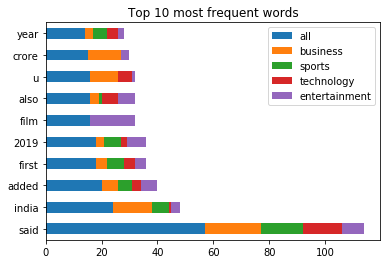

In [78]:
plt.figure(figsize=(10, 10))
word_counts_sorted.plot.barh(stacked=True)
plt.title('Top 10 most frequent words')
plt.show()

### Word clouds

(-0.5, 399.5, 199.5, -0.5)

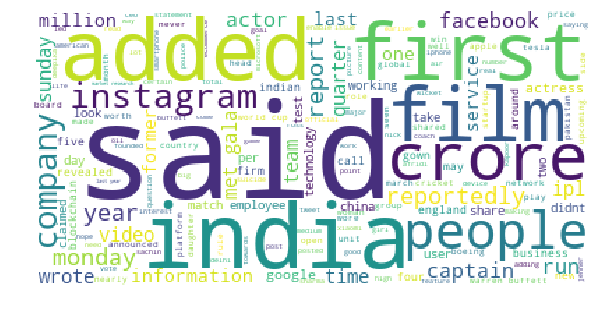

In [81]:
plt.figure(figsize=(10,10))
img = WordCloud(background_color='white').generate(' '.join(all_words))
plt.imshow(img)
plt.axis('off')


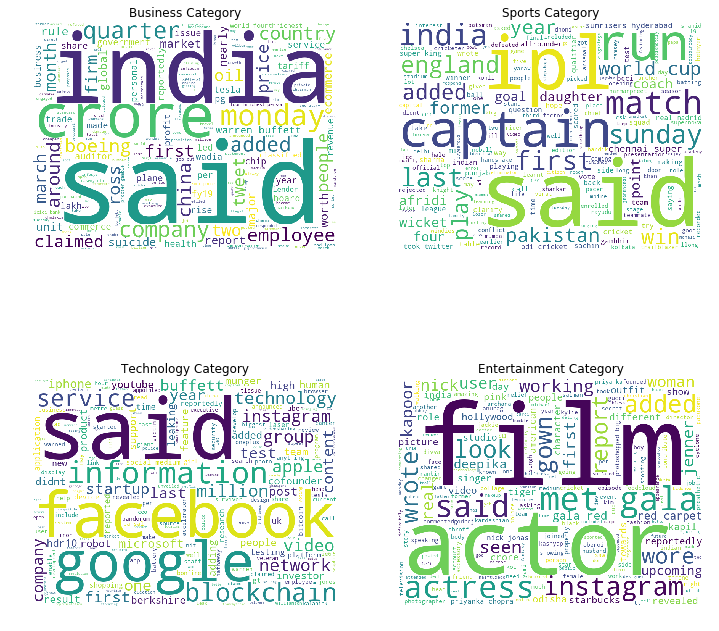

In [86]:
biz_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(biz_words))
spo_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spo_words))
tech_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(tech_words))
ent_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ent_words))

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(biz_cloud)
plt.axis('off')
plt.title('Business Category')

plt.subplot(2, 2, 2)
plt.imshow(spo_cloud)
plt.axis('off')
plt.title('Sports Category')

plt.subplot(2, 2, 3)
plt.imshow(tech_cloud)
plt.axis('off')
plt.title('Technology Category')

plt.subplot(2, 2, 4)
plt.imshow(ent_cloud)
plt.axis('off')
plt.title('Entertainment Category')

plt.box(False)

### Make some bigrams for these dfs too...

In [94]:
biz_bigrams = nltk.ngrams(biz_words, 2)
spo_bigrams = nltk.ngrams(spo_words, 2)
tech_bigrams = nltk.ngrams(tech_words, 2)
ent_bigrams = nltk.ngrams(ent_words, 2)


In [97]:
top_20_biz_bigrams = (pd.Series(nltk.ngrams(biz_words, 2)).value_counts().head(20))
top_20_spo_bigrams = (pd.Series(nltk.ngrams(spo_words, 2)).value_counts().head(20))
top_20_tech_bigrams = (pd.Series(nltk.ngrams(tech_words, 2)).value_counts().head(20))
top_20_ent_bigrams = (pd.Series(nltk.ngrams(ent_words, 2)).value_counts().head(20))



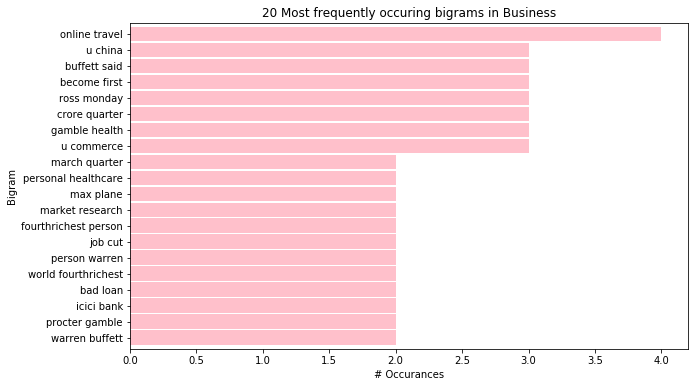

In [100]:
top_20_biz_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bigrams in Business')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_biz_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

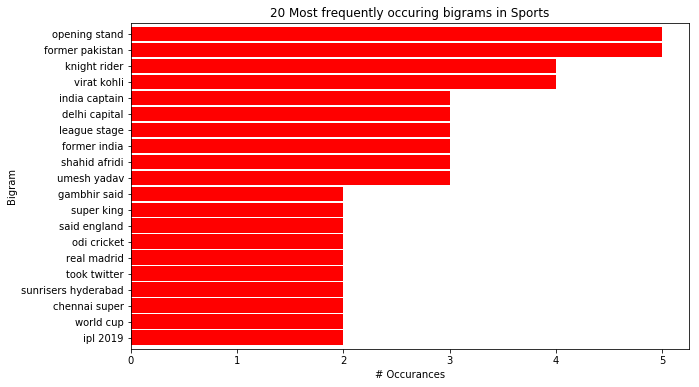

In [101]:
top_20_spo_bigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))
plt.title('20 Most frequently occuring bigrams in Sports')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spo_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

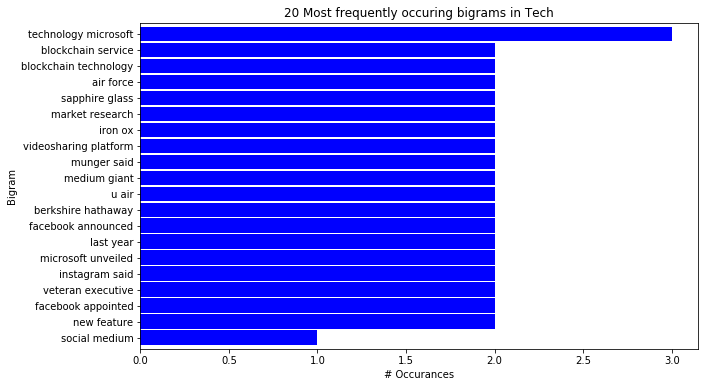

In [102]:
top_20_tech_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))
plt.title('20 Most frequently occuring bigrams in Tech')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_tech_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

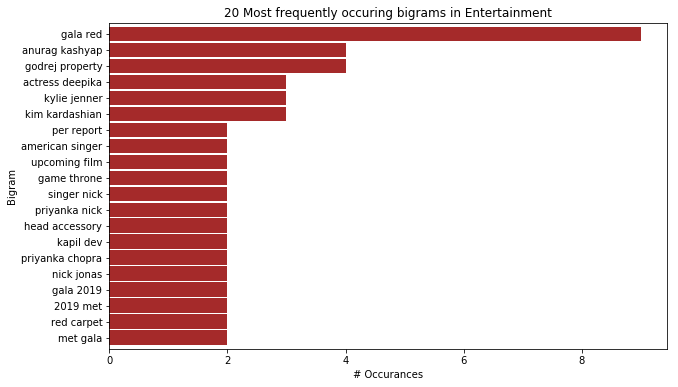

In [103]:
top_20_ent_bigrams.sort_values().plot.barh(color='brown', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bigrams in Entertainment')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ent_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

### Make some Word clouds with the bigrams

(-0.5, 799.5, 399.5, -0.5)

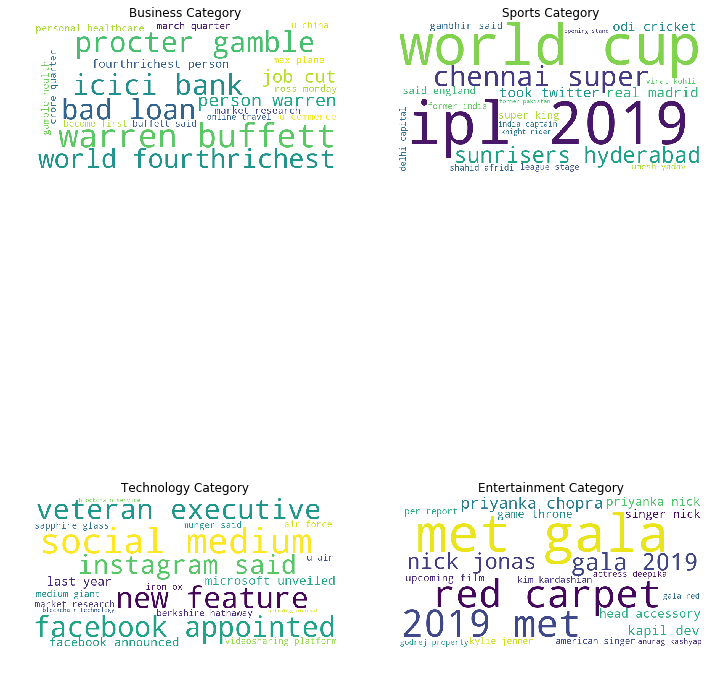

In [108]:
data1 = {k[0] + ' ' + k[1]: v for k, v in top_20_biz_bigrams.to_dict().items()}
img1 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data1)

data2 = {k[0] + ' ' + k[1]: v for k, v in top_20_spo_bigrams.to_dict().items()}
img2 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data2)

data3 = {k[0] + ' ' + k[1]: v for k, v in top_20_tech_bigrams.to_dict().items()}
img3 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data3)

data4 = {k[0] + ' ' + k[1]: v for k, v in top_20_ent_bigrams.to_dict().items()}
img4 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data4)

plt.figure(figsize=(12, 16))

plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.title('Business Category')

plt.subplot(2, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.title('Sports Category')

plt.subplot(2, 2, 3)
plt.imshow(img3)
plt.axis('off')
plt.title('Technology Category')

plt.subplot(2, 2, 4)
plt.imshow(img4)
plt.axis('off')
plt.title('Entertainment Category')

plt.axis('off')